In [20]:
import numpy as np
import pandas as pd
import warnings
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
warnings.filterwarnings('ignore')
import spacy
en = spacy.load('en_core_web_sm')
from time import time
from tqdm import tqdm
from nltk import pos_tag
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS,Phraser
from gensim.models import Word2Vec, KeyedVectors #To load the model
from cleantext import clean
from sklearn.manifold import TSNE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
model=Word2Vec.load('rightantisemiw2v_model')

In [4]:
model.wv['in']

array([ 3.77099305e-01, -3.88211273e-02,  2.19063014e-01,  1.90332711e-01,
       -1.55062184e-01, -3.86948907e-03, -1.74527019e-01, -1.07308850e-01,
        1.63369477e-01,  1.01091668e-01,  1.62741274e-01, -1.35650598e-02,
        2.02906743e-01,  2.28522837e-01, -1.73299506e-01,  4.54562753e-02,
       -2.06697658e-01, -4.25733984e-01,  7.56568164e-02,  8.83516669e-02,
       -1.74816493e-02,  2.04589903e-01,  2.10570157e-01,  2.76479423e-01,
       -1.63266398e-02, -4.34778333e-02, -1.00256376e-01,  2.28654042e-01,
        3.00892234e-01,  9.19797495e-02, -1.42075151e-01, -3.02611049e-02,
        1.17086567e-01,  8.33040401e-02,  1.58854723e-02, -4.14494783e-01,
        1.30634859e-01, -1.56091675e-01, -1.32325560e-01,  1.00154035e-01,
        2.25766674e-02, -1.17639773e-01, -9.16794017e-02, -5.96082620e-02,
       -1.54585823e-01, -1.35276889e-04, -7.09781377e-03,  2.41638318e-01,
       -2.23589167e-02,  1.74345332e-03,  2.71024704e-01,  2.21366957e-02,
       -3.86921428e-02, -

In [5]:
len(eval('model').wv.index_to_key)

17892

In [8]:
window6=pd.read_csv("/Users/dhanushkikkisetti/Documents/Research Assistant/Research_paper/Important_terms 6.csv")
bigrams_tfidf=list(window6['Bigrams'])
#Importing Key words that Yake algorithm produceded for each windows and doing union for all of those as a single list
# There are total 12 windows with 5 windowsize
#yake_vocab=[]
#for file in range(12):
#    important=pd.read_csv("/Users/dhanushkikkisetti/Downloads/YakeBigram_frequency "+ str(file+1)+".csv")
#    terms=list(important['Bigrams'])
#    for term in terms:
 #       if term not in yake_vocab:
 #           yake_vocab.append(term)
#print(yake_vocab)

In [9]:
tfidf_bigram=['_'.join(i.split()) for i in bigrams_tfidf]
#yake_vocab=['_'.join(i.split()) for i in yake_vocab]
print(tfidf_bigram[1:10])
#print(yake_vocab[1:10])

['deep_state', 'ect_ect', 'united_state', 'kike_kike', 'alex_jones', 'soros_soros', 'world_order', 'klaus_schwab', 'white_hat']


In [10]:
len(bigrams_tfidf)

150

In [9]:
#Doing union for both these vocab
#final_vocab=[]
#for i in tfidf_bigram:
#    if i not in final_vocab:
#        final_vocab.append(i)
#for i in yake_vocab:
#    if i not in final_vocab:
 #       final_vocab.append(i)
#len(final_vocab)

155

In [11]:
novectfound=[]
for i in tfidf_bigram:
    try:
        model.wv[i]
    except KeyError:
        #print(f"{term } is not trained in the word2ve model")
        novectfound.append(i)
#print(len(a))

In [12]:
finalvec_terms=[]
for i in tfidf_bigram:
    if i not in novectfound:
        finalvec_terms.append(i)
len(finalvec_terms)

107

## Just Checking for semanctic space bigrams clustering using TSNE

In [38]:
imp_terms=['fuck kike','medium figure','george soros','deep state','world order','white people','white hat','mafia brat','gaylord obama',
                     'rothschild family','new world','jew trump','central bank','control world','conspiracy theory',
                     'soros schwab','zionist jew','open society','ect ect','brat pelosi','talmud','globalist','joe biden',
          'nancy pelosi','klaus schwab','fucking kike','nazi soros','rothschild','bill gate','elites','fauci','joe rogan']
imp_terms=['_'.join(i.split()) for i in imp_terms]

In [39]:
color=[]
for i in finalvec_terms:
    if i in imp_terms:
        color.append('blue')
    else:
        color.append('black')

In [75]:
X = model.wv[finalvec_terms]

tsne=TSNE(perplexity=5,n_iter=5000)
result=tsne.fit_transform(X)
#result

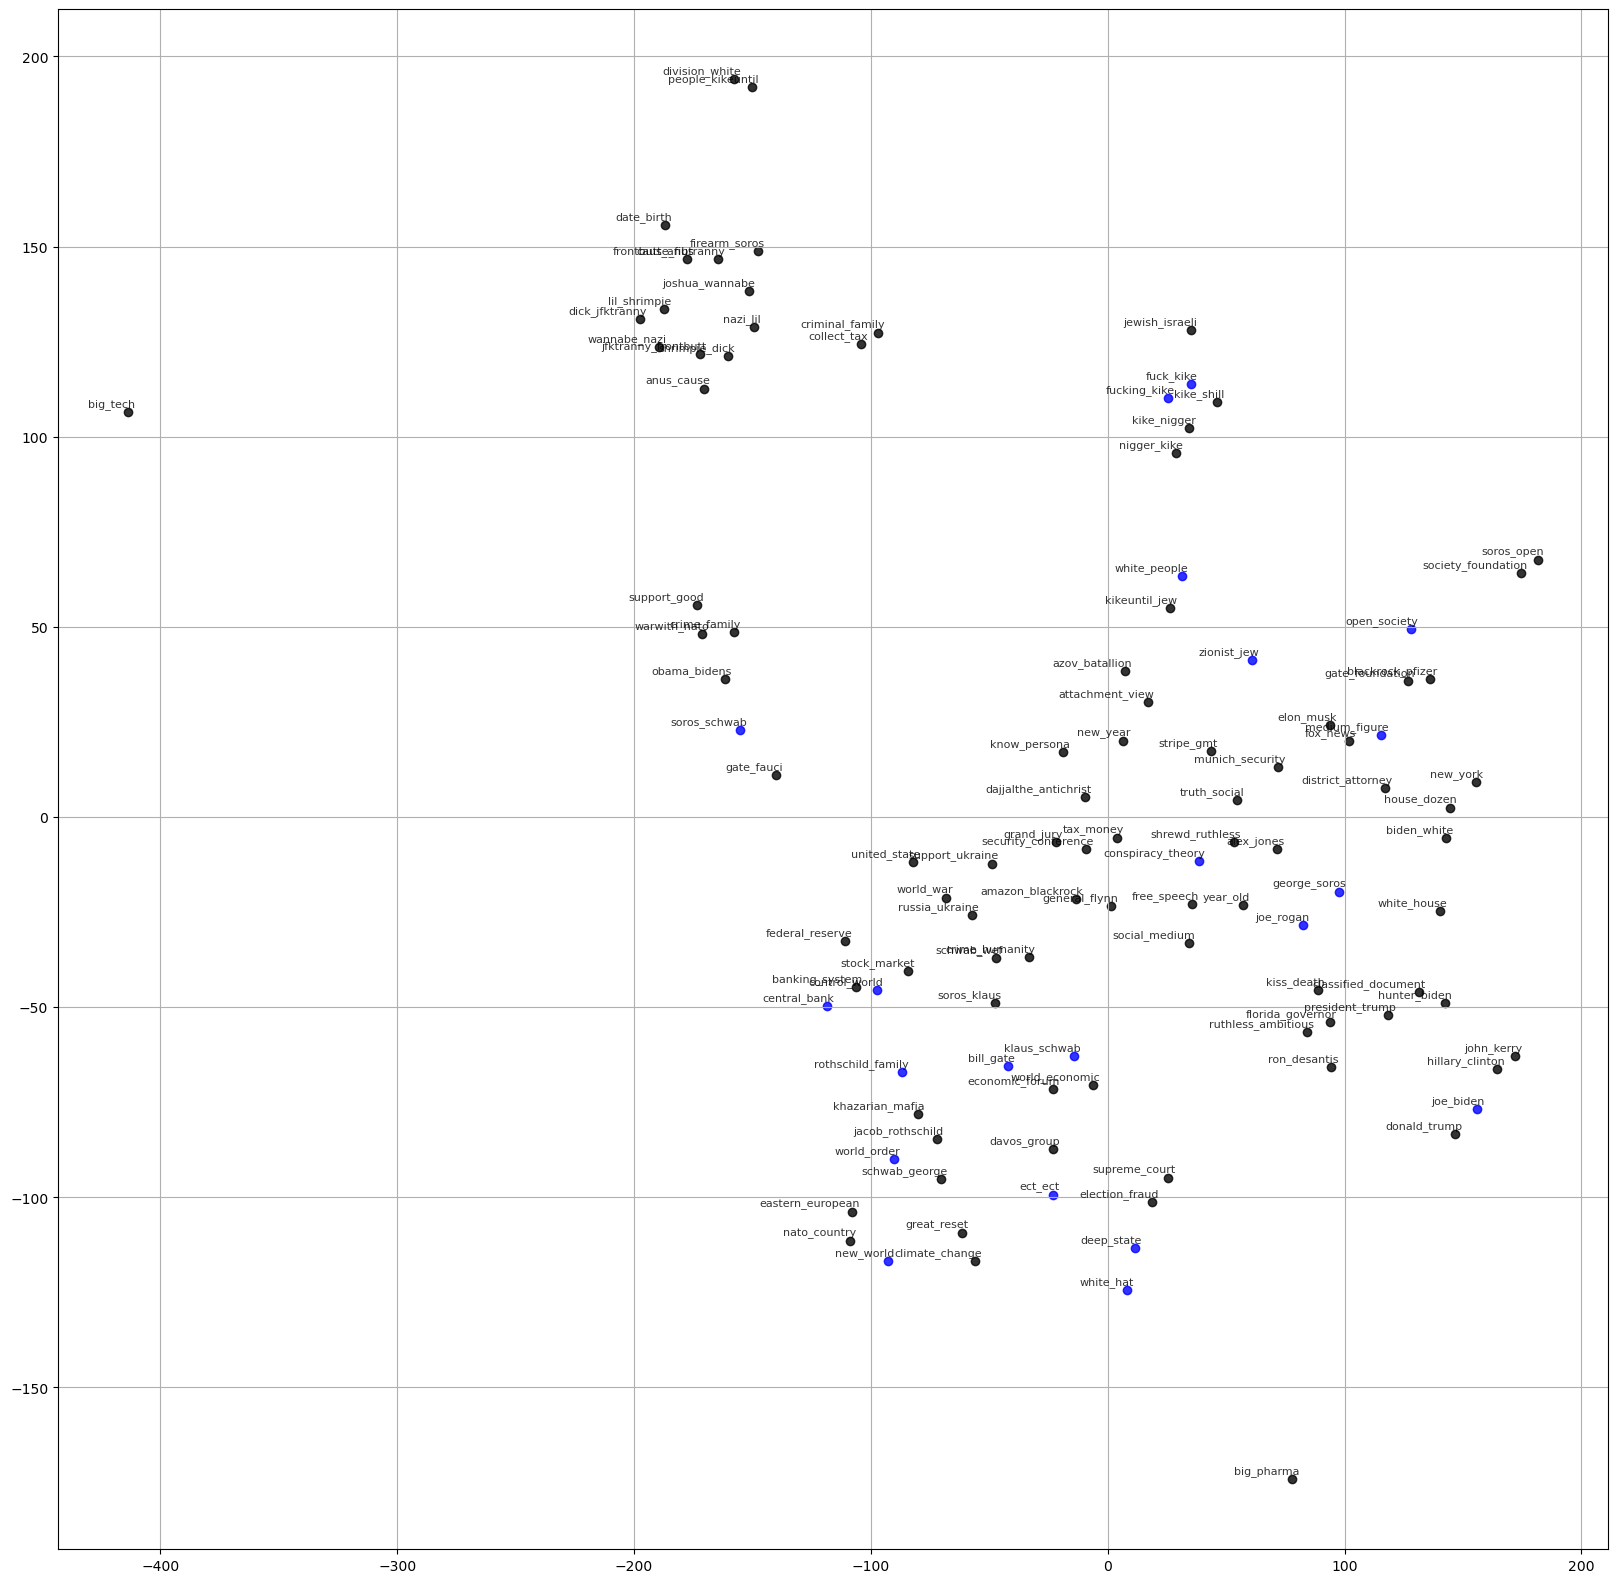

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(20,20))
for i in range(len(finalvec_terms)):
    plt.scatter(result[i,0],result[i,1],c=color[i],alpha=0.8)
for i, word in enumerate(finalvec_terms):
    plt.annotate(word, alpha=0.8, xy=(result[i, 0], result[i, 1]), xytext=(5, 2),
                textcoords='offset points', ha='right', va='bottom', size=8)
plt.grid(True)
plt.show()

In [13]:
intial_glossary_used=['zog','kike','george_soros','rothschild','nigger']


In [14]:
similarity_df=pd.DataFrame(columns=['Term','zog','kike','george soros','rothschild','nigger','Average'])

In [15]:
similarity_scores=[]
for bigram in tfidf_bigram:
    vec=np.random.uniform(-0.0001,-0.00001,200)
    score=[bigram]
    s=0
    for anti in intial_glossary_used:
        try:
            sim=model.wv.similarity(bigram,anti)
            score.append(sim)
            s=s+sim
        except KeyError:
            cos_sim=np.dot(vec,model.wv[anti])/(np.linalg.norm(vec)*np.linalg.norm(model.wv[anti]))
            score.append(cos_sim)
            s=s+cos_sim
    score.append(s/5)
    similarity_df.loc[len(similarity_df)]=score

In [16]:
print(similarity_df.to_string())

                     Term       zog      kike  george soros  rothschild    nigger   Average
0            george_soros  0.236617  0.163366      1.000000    0.133440  0.079023  0.322489
1              deep_state  0.201637  0.150942      0.400054    0.217507  0.168451  0.227718
2                 ect_ect  0.105124  0.014445      0.172354    0.192081  0.038136  0.104428
3            united_state  0.141195  0.111539      0.225366    0.059033  0.146813  0.136789
4               kike_kike  0.024562 -0.071625     -0.066941   -0.049338 -0.022254 -0.037119
5              alex_jones  0.184259  0.182151      0.343878    0.215506  0.197956  0.224750
6             soros_soros  0.016108 -0.065932     -0.069942   -0.058723  0.014316 -0.032834
7             world_order  0.350828  0.318565      0.447834    0.314221  0.303260  0.346942
8            klaus_schwab  0.227472  0.171808      0.606397    0.198248  0.062096  0.253204
9               white_hat  0.224849  0.116846      0.191621    0.248229  0.09928

In [17]:
threshold=sum(similarity_df['Average'])/len(similarity_df['Average'])
similarity_df['predict']=similarity_df.Average.apply(lambda x:1 if x>threshold else 0)

In [18]:
pd.DataFrame(similarity_df).to_csv('similarity_df.csv')

In [35]:
similarity_df=pd.read_csv("/Users/dhanushkikkisetti/Documents/Research Assistant/Research_paper/similarity_df.csv")

In [23]:
true=list(similarity_df['true_label'])
predict=list(similarity_df['predict'])

In [25]:
print("Accuracy Score :",accuracy_score(true,predict))
print("Precision Score :",precision_score(true,predict))
print("Recall Score :",recall_score(true,predict))
print("F1_Score :",f1_score(true,predict))


Accuracy Score : 0.74
Precision Score : 0.6363636363636364
Recall Score : 0.8888888888888888
F1_Score : 0.7417218543046358


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true,predict)

array([[55, 32],
       [ 7, 56]])

In [37]:
similarity_df=similarity_df[(similarity_df['true_label']==1) & (similarity_df['predict']==1)]

In [43]:
imp_terms=list(similarity_df['Term'])
imp_terms=[' '.join(i.split('_')) for i in imp_terms]
imp_terms

['george soros',
 'deep state',
 'alex jones',
 'world order',
 'klaus schwab',
 'white hat',
 'free speech',
 'central bank',
 'new world',
 'open society',
 'zionist jew',
 'social medium',
 'support ukraine',
 'rothschild family',
 'economic forum',
 'russia ukraine',
 'nigger kike',
 'elon musk',
 'world economic',
 'white people',
 'joe biden',
 'khazarian mafia',
 'election fraud',
 'crime family',
 'world war',
 'soros schwab',
 'joe rogan',
 'schwab wef',
 'climate change',
 'jacob rothschild',
 'big pharma',
 'tax money',
 'banking system',
 'district attorney',
 'eastern european',
 'biden white',
 'crime humanity',
 'division white',
 'kikeuntil jew',
 'people kikeuntil',
 'conspiracy theory',
 'gate fauci',
 'jewish israeli',
 'kike shill',
 'house dozen',
 'kike nigger',
 'warwith nato',
 'ron desantis',
 'kiss death',
 'florida governor',
 'munich security',
 'shrewd ruthless',
 'security conference',
 'firearm soros',
 'nazi lil',
 'wannabe nazi']

In [39]:
def terms_frequency(starting_date,windowsize):
    df=pd.DataFrame(columns=imp_terms)
    x=pd.to_datetime(starting_date)
    r={}
    check=True
    if x>data['Date'].max():
        return 'Check the starting date'
    
    while(check):
        r['date']=x
        if (x+timedelta(days=windowsize))>=data['Date'].max():
            y=data['Date'].max()
            check=False
        else:
            y=(x+timedelta(days=windowsize))
        data1=data['Cleaned Text'][(data['Date']>=x)&(data['Date']<y)]
        text=' '.join(data1)
        x=x+timedelta(days=windowsize)
        
        text1=text.split(" ")
        pairs=list(zip(text1[:-1],text1[1:]))
        bigrams=[' '.join(i) for i in pairs]
        for i in range(1,len(imp_terms)):
            r[imp_terms[i]]=0
            for j in bigrams:
                if j==imp_terms[i] or imp_terms[i] in j:
                    r[imp_terms[i]]=r[imp_terms[i]]+1
        df=df.append(r,ignore_index = True)
        
    return df
        
    

In [40]:
new=terms_frequency(starting_date='2022-12-24',windowsize=6)

NameError: name 'data' is not defined